In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import pickle
import json
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 11)}, font_scale=2)
sns.set_style("whitegrid")

from tqdm import tqdm

# Import Custom packages
import sys
sys.path.append('../../')
import utils
import semantic_type_propagation as stp

# Tripartite vs. Bipartite Graph

In [3]:
df_path_tripartite = '../../output/synthetic_example_tripartite/'
df_path_bipartite = '../../output/synthetic_example_bipartite/'
g_path = '../../../graph_construction/combined_graphs_output/synthetic_benchmark/tripartite/tripartite.graph'


G = pickle.load(open(g_path, "rb"))
df_tr = pd.read_pickle(df_path_tripartite + 'graph_stats_df.pickle')
df_bi = pd.read_pickle(df_path_bipartite + 'graph_stats_with_groundtruth_df.pickle')

# Create the 'graph_stats_with_groundtruth_df' dataframe
df_tr['is_homograph'] = np.nan
is_homograph_map = {}
for node in df_tr[df_tr['node_type']=='cell']['node']:
    is_homograph_map[node] = utils.groundtruth.is_cur_node_homograph(G, node)
df_tr['is_homograph'] = df_tr['node'].map(is_homograph_map)
df_tr.to_pickle(df_path_tripartite+'graph_stats_with_groundtruth_df.pickle')


# Remove nodes with degree 1 from the dataframe
df_tr = stp.process_df(df_tr, G)
df_bi = stp.process_df(df_bi, G)
df_tr = df_tr.sort_values(by='betweenness_centrality', ascending=False)

# Compute the number of row nodes each cell node is connected to
df_tr['num_row_nodes'] = [len(utils.graph_helpers.get_neighbors_of_instance(G, node, 'row')) for node in df_tr['node']]
df_tr['num_col_nodes'] = [len(utils.graph_helpers.get_neighbors_of_instance(G, node, 'attr')) for node in df_tr['node']]
df_tr['num_cell_node_neighbors'] = [len(utils.graph_helpers.get_cell_node_neighbors(G, node)) for node in df_tr['node']]
df_tr['num_row_wise_neighbors'] = [len(utils.graph_helpers.get_row_wise_neighbors(G, node)) for node in df_tr['node']]


df_tr.head(50)

There are 17633 cell nodes with a degree greater than 1
There are 9235 unique ranks based on BC.
There are 17633 cell nodes with a degree greater than 1
There are 101 unique ranks based on BC.


,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_row_nodes,num_col_nodes,num_cell_node_neighbors,num_row_wise_neighbors
7,China,cell,0.078365,False,1.0,1280,7,194,2050
67,Indonesia,cell,0.044116,False,2.0,760,7,194,1265
2118,CN,cell,0.021590,False,3.0,552,3,162,483
27,Russia,cell,0.020155,False,4.0,400,7,194,665
258,Cuba,cell,0.018760,True,5.0,27,8,1172,50
60,Philippines,cell,0.018151,False,6.0,355,7,194,584
24,Brazil,cell,0.014481,False,7.0,289,7,194,461
2115,ID,cell,0.012162,True,8.0,309,4,188,313
21,Portugal,cell,0.011359,False,9.0,239,7,194,391
90,Poland,cell,0.010666,False,10.0,213,7,194,346


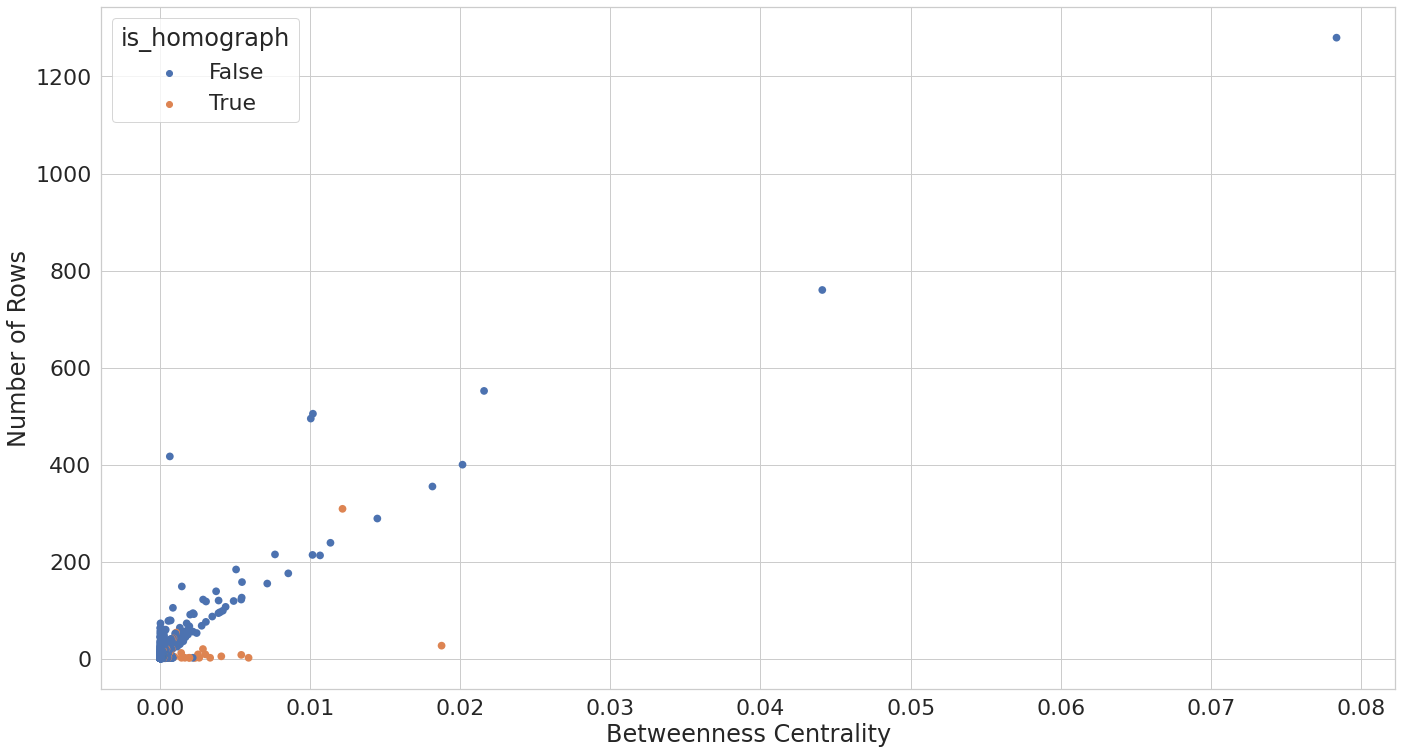

In [8]:
ax = sns.scatterplot(data=df_tr, x='betweenness_centrality', y='num_row_nodes', hue='is_homograph', linewidth=0, s=60)
ax.set(xlabel='Betweenness Centrality', ylabel='Number of Rows')

plt.tight_layout()
plt.savefig("../../figures/row_context/bc_vs_num_rows.svg")

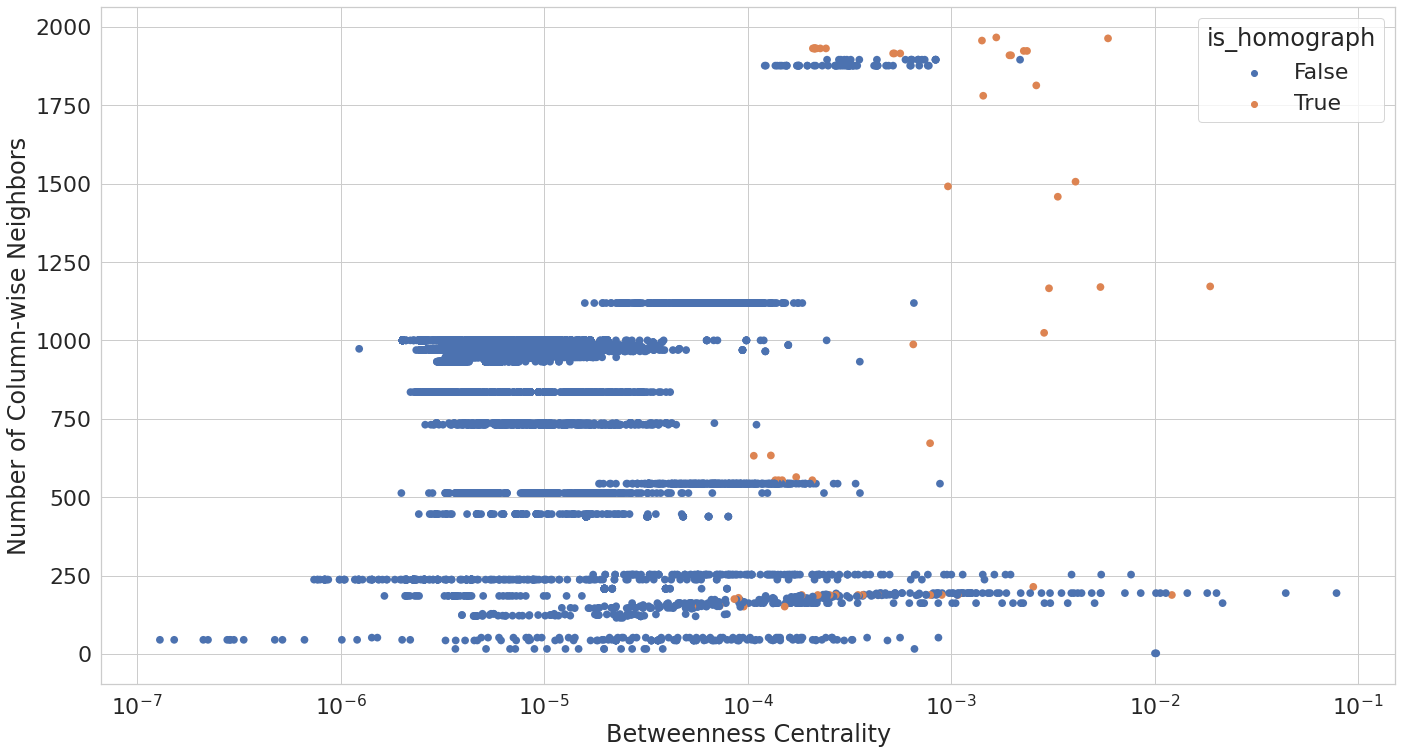

In [14]:
ax = sns.scatterplot(data=df_tr, x='betweenness_centrality', y='num_cell_node_neighbors', hue='is_homograph', linewidth=0, s=60)
ax.set(xlabel='Betweenness Centrality', ylabel='Number of Column-wise Neighbors', xscale='log')

plt.tight_layout()
plt.savefig("../../figures/row_context/bc_vs_num_column_neighbors_log.svg")

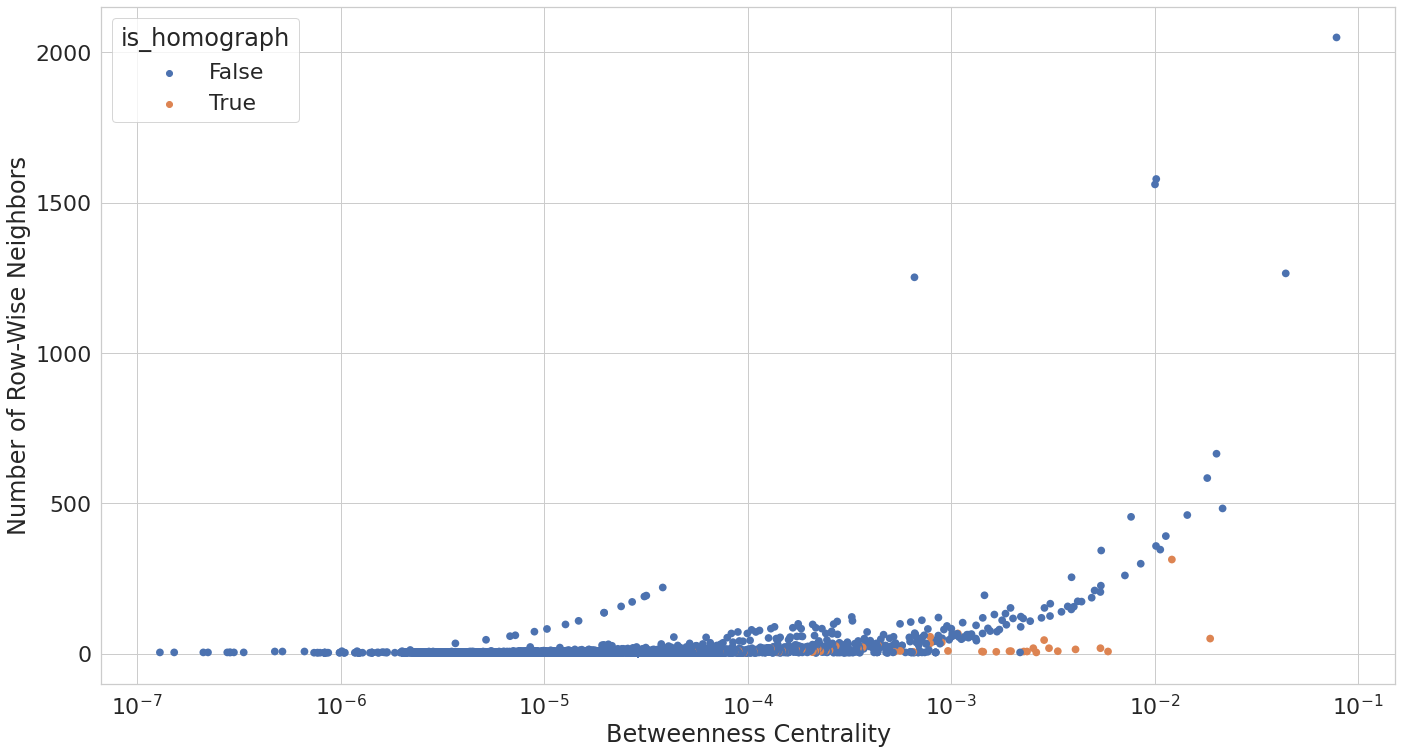

In [16]:
ax = sns.scatterplot(data=df_tr, x='betweenness_centrality', y='num_row_wise_neighbors', hue='is_homograph', linewidth=0, s=60)
ax.set(xlabel='Betweenness Centrality', ylabel='Number of Row-Wise Neighbors', xscale='log')
plt.tight_layout()
plt.savefig("../../figures/row_context/bc_vs_num_row_neighbors_log.svg")

In [26]:
df_tr.sort_values(by='num_row_nodes', ascending=False)

,node,node_type,betweenness_centrality,is_homograph,dense_rank,num_row_nodes
7,China,cell,7.836521e-02,False,1.0,1280
67,Indonesia,cell,4.411561e-02,False,2.0,760
2118,CN,cell,2.158951e-02,False,3.0,552
16231,Male,cell,1.019182e-02,False,11.0,505
16235,Female,cell,1.004930e-02,False,13.0,495
...,...,...,...,...,...,...
16967,Rawle,cell,8.902213e-06,False,4272.0,1
18648,Tyndall,cell,8.902213e-06,False,4272.0,1
18029,Warlock,cell,8.902213e-06,False,4272.0,1
16518,Treadgear,cell,8.902213e-06,False,4272.0,1


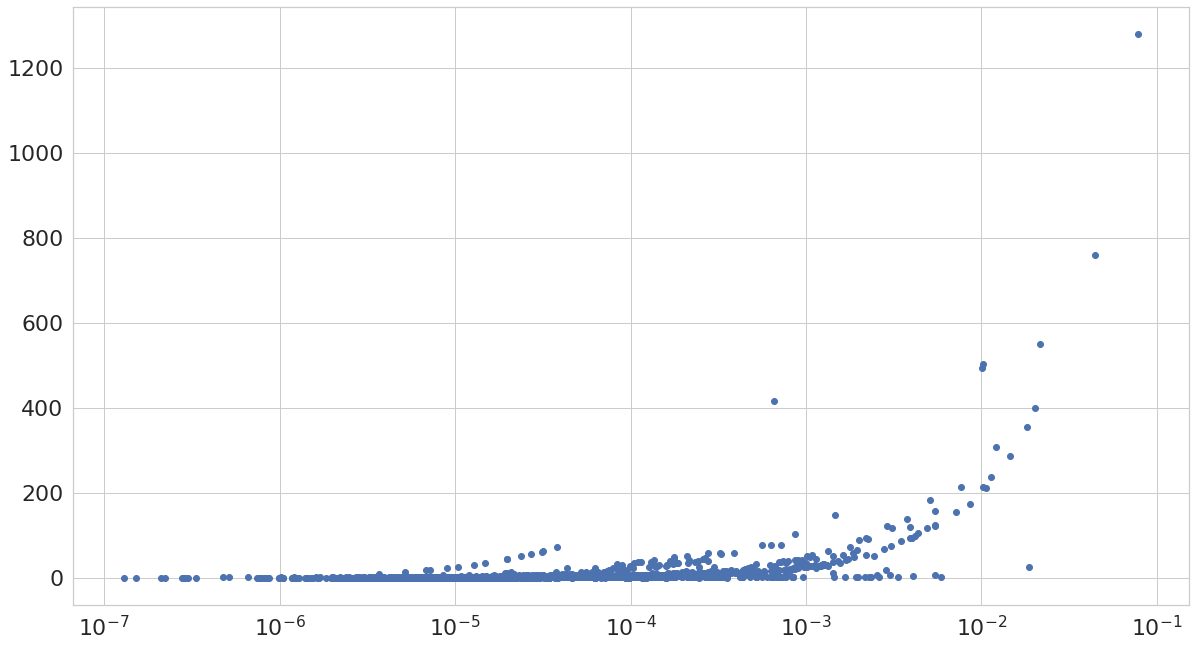

In [11]:
plt.scatter(df_tr['betweenness_centrality'], df_tr['num_row_nodes'])
plt.xscale('log')

In [3]:
df_bi.head(40)

,node,node_type,betweenness_centrality,is_homograph,pagerank,dense_rank
2384,Jaguar,cell,0.054344,True,0.000064,1.0
10229,Mace,cell,0.032803,True,0.000052,2.0
300,Lincoln,cell,0.032120,True,0.000052,3.0
4228,Heather,cell,0.029653,True,0.000052,4.0
5701,Leandra,cell,0.026115,True,0.000052,5.0
6646,Charity,cell,0.026115,True,0.000052,5.0
15222,Ram,cell,0.025395,True,0.000052,6.0
981,Phoenix,cell,0.021940,True,0.000052,7.0
10357,Elan,cell,0.016661,True,0.000052,8.0
10915,Jimmy,cell,0.016308,True,0.000052,9.0
